## Assigment 5 notebook

#### In this notebook we will the probability exercises in assignment 5.

In [331]:
# load the packages used for calculation and plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from scipy.integrate import quad
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as panda

### Exercise 1 (a)

probs: [0.0, 0.029411764705882353, 0.058823529411764705, 0.38235294117647056, 0.2647058823529412, 0.23529411764705882, 0.029411764705882353]
sum of all probablities: 1.0


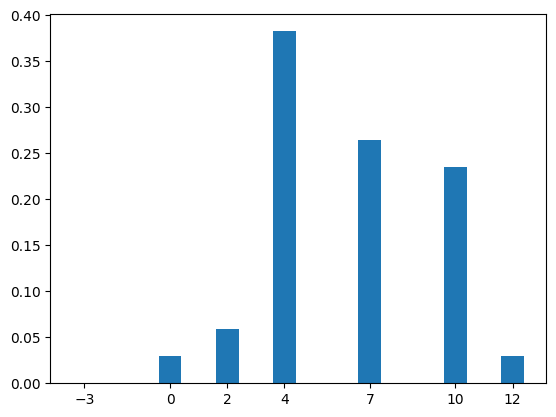

In [332]:
data = panda.read_excel("MASD2024_data.xlsx")

expected_grades = data["What grade do you expect to get in the course?"].tolist()
Rx = [-3, 0, 2, 4, 7, 10, 12]
def p_X(x_k):
    return (expected_grades.count(x_k) / len(expected_grades))

def pmf(pxk: Callable):
    y = []
    for grade in Rx:
        y.append(pxk(grade))
    print("probs:",y)
    print("sum of all probablities:",sum(y))
    plt.bar(Rx, y)
    plt.xticks(Rx)
    plt.show()

pmf(p_X)


### Exercise 1b
We are to find the expected value of X (the grades), we do se by using the sum formula for expectation in lecture1_week6.pdf slide 35

In [333]:
EX = 0
for grade in Rx:
    EX += grade * p_X(grade)
print("Expected value EX:",EX)


Expected value EX: 6.205882352941177


### Exercise 1c
We are to compute the variance of the expected grades based on the pmf. We do so by using the variance formula from lecture2_week6:

$$
\text{Var}(X) = E(X^2) - [E(X)]^2
$$
We already calculated the expected value earlier in 1b, so now we calculate $E(X^2)$:


In [334]:
EX_squared = 0
for grade in Rx:
    EX_squared += (grade*grade) * p_X(grade)

print("Expected value [EX]^2:",EX*EX)
print("Expected value squared EX^2:",EX_squared)

# Now we can compute the variance as E(X^2) - [E(X)]^2:
var_X = EX_squared - (EX*EX)
print("Variance of X: E(X^2) - [E(X)]^2 =", var_X)

Expected value [EX]^2: 38.51297577854672
Expected value squared EX^2: 47.088235294117645
Variance of X: E(X^2) - [E(X)]^2 = 8.575259515570927


### Exercise 2a
We are to determine what the prior probability that a student has a high nervousness is ($nervousness \geq 5$)

In [335]:
nv_level_data = data["The thought of being enrolled in a mathematics/statistics course makes me nervous."].tolist()
nv_level = [entry for entry in nv_level_data if isinstance(entry, float) and not np.isnan(entry)]

nv_geq_5 = [entry for entry in nv_level if entry >= 5.0]

P_high_nv = len(nv_geq_5) / len(nv_level)
print("P(high_nv) =", P_high_nv)

P(high_nv) = 0.5806451612903226


### Exercise 2b
We are to calculate the conditional probability (likelihood) that a student attended an HTX high school, given that they
have low nervousness (nervousness < 5): P(Student_attended_HTX | nv < 5)

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

In [336]:
student_school = data["What type of high-school did you attend?"].tolist()
nv_less_5 = [entry for entry in nv_level if entry < 5.0]


P_htx = student_school.count("HTX") / len(student_school)
P_nv_less_than_5 = len(nv_less_5) / len(nv_level)
P_intersect = len([nv for nv, school in zip(nv_level, student_school) if nv < 5 and school == "HTX"]) / len(student_school)

P_htx_given_nv_less_than_5 = P_intersect / P_htx

print("P(HTX|Low nervousness(<5)):", P_htx_given_nv_less_than_5)



P(HTX|Low nervousness(<5)): 0.39999999999999997


### Exercise 2c
We are to Calculate the conditional probability (likelihood) that a student attended an STX high school, given that they
have low nervousness (< 5): P(Student_attended_STX | nv < 5)

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

In [337]:
P_stx = student_school.count("STX") / len(student_school)
P_intersect_nvless5_stx = len([nv for nv, school in zip(nv_level, student_school) if nv < 5 and school == "STX"]) / len(student_school)
P_stx_given_nv_less_than_5 = P_intersect_nvless5_stx / P_stx
print("P(STX|Low nervousness(<5)):", P_stx_given_nv_less_than_5)



P(STX|Low nervousness(<5)): 0.3913043478260869


### Exercise 2d
We are to calculate the conditional probability (posterior) that a student attended an HTX high school,
given that they have low nervousness, using bayes rule. Bayes rule is defined as:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where P(A|B) is the posterior probability.


In [338]:
# We start by calculating the conditional probability P(nv<5 | HTX):
P_nvl5_given_htx = P_intersect / P_nv_less_than_5

# Now we calculate the posterior probability using bayes rule:
htx_given_nvl5_bayes = (P_nvl5_given_htx * P_nv_less_than_5) / P_htx

print("Conditional probability (posterior) that a student attended an HTX high school, given that they have low nervousness, using bayes rule:",htx_given_nvl5_bayes)


Conditional probability (posterior) that a student attended an HTX high school, given that they have low nervousness, using bayes rule: 0.4


### Exercise 2e
We are to calculate the conditional probability (posterior) that a student attended an STX high school,
given that they have low nervousness, using bayes rule. Bayes rule is defined as:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where P(A|B) is the posterior probability.


In [339]:
# We start by calculating the conditional probability P(nv<5 | HTX):
P_nvl5_given_stx = P_intersect_nvless5_stx / P_nv_less_than_5

# Now we calculate the posterior probability using bayes rule:
stx_given_nvl5_bayes = (P_nvl5_given_stx * P_nv_less_than_5) / P_stx

print("Conditional probability (posterior) that a student attended an STX high school, given that they have low nervousness, using bayes rule:",stx_given_nvl5_bayes)


Conditional probability (posterior) that a student attended an STX high school, given that they have low nervousness, using bayes rule: 0.3913043478260869


### Exercise 2f
Q: Based on the posterior probabilities, does the data support the assumption that students from HTX high schools
tend to feel more comfortable (as indicated by lower nervousness) compared to STX?


Answer: Given our results from calculating the posterior probabilities, we can conclude that there is a slight (approx. 1%) greater probablity that an HTX student would be more confident (ie. have low nervousness)

In [340]:
print("Probability of low nervousness in:")
print("STX:",stx_given_nvl5_bayes)
print("HTX:",htx_given_nvl5_bayes)
moreComfy = "STX students" if (stx_given_nvl5_bayes > htx_given_nvl5_bayes) else "HTX students"
lessComfy = "HTX students" if (stx_given_nvl5_bayes > htx_given_nvl5_bayes) else "STX students"
print (f"Based on on the posterior probabilities {moreComfy} tend to be more comfortable compared to {lessComfy}")

Probability of low nervousness in:
STX: 0.3913043478260869
HTX: 0.4
Based on on the posterior probabilities HTX students tend to be more comfortable compared to STX students


### Exercise 3a
We are to simply use the given CDF to compute the probability that a student’s expected grade is less than 7. We do so, by simply plugging 7 into our CDF.

In [341]:
def CDF(x):
    if (x < -3):
        return 0
    elif (x >= -3 and x < 2):
        return 0.0588 * (x + 3)
    elif (x >= 2 and x < 7):
        return 0.294 + 0.1176 * (x - 2)
    elif (x >= 7 and x < 12):
        return 0.882 + 0.0235 * (x - 7)
    elif (x >= 12):
        return 1

P_expected_grade_less_than_7 = CDF(7)
print ("Probability that a student’s expected grade is less than 7:", P_expected_grade_less_than_7)

Probability that a student’s expected grade is less than 7: 0.882


### Exercise 3b
We are to Compute the median (50th percentile) of the expected grade distribution using the given CDF.

This means we need to find the value of x for the CDF that gives us 0.5
We do so by isolating x in the valid range of the CDF where its possible to get 0.5, which is when (x >= 2 and x < 7):

$$
0.294 + 0.1176 * (x - 2) = 0.5
$$
We now isolate x:
$$
0.1176 * (x - 2) = 0.5-0.294
$$
$$
x - 2 = \frac{0.206}{0.1176}
$$
$$
x = \frac{0.206}{0.1176} + 2
$$


In [342]:
print("Median (50th percentile):", (0.206/0.1176)+2)

Median (50th percentile): 3.751700680272109


### Exercise 3c
We are to derive the probability density function (PDF) from the given CDF and estimate the expected value and variance
of the expected grades

We know that the PDF can be derived from the CDF by taking the derivative of the CDF. Therefor we do so now:

$$
\text{CDF}(x) =
\begin{cases} 
0 & \text{if } x < -3 \\
0.0588 \cdot (x + 3) & \text{if } -3 \leq x < 2 \\
0.294 + 0.1176 \cdot (x - 2) & \text{if } 2 \leq x < 7 \\
0.882 + 0.0235 \cdot (x - 7) & \text{if } 7 \leq x < 12 \\
1 & \text{if } x \geq 12
\end{cases}

$$

When taking the derivative of a piecewise funciton, we simply take the derivative of each defined part of the function as so:

$\text{if } x < -3$
Here taking the derivative of a constant is just 0.
$$
\frac{d}{dx}(0) = 0
$$
$\text{if } -3 \leq x < 2$
$$
\frac{d}{dx}(0.0588 \cdot (x + 3))
$$
Firstly we multiply into the parentheses:
$$
\frac{d}{dx}(0.0588x + 0.1764)
$$
Now its clear that we have a linear equation, and we use the linear function rule $\frac{d}{dx}a*x+b = a$
$$
\frac{d}{dx}(0.0588x + 0.1764) = 0.0588
$$
$\text{if } 2 \leq x < 7$
$$
\frac{d}{dx}(0.294 + 0.1176 \cdot (x - 2)) = 
$$
Again we see here the same pattern as before, so we know that we have to use the linear function rule:
$$
\frac{d}{dx}(0.294 + 0.1176 \cdot (x - 2)) = 0.1176
$$
$\text{if } 7 \leq x < 12$
$$
\frac{d}{dx}(0.882 + 0.0235 \cdot (x - 7)) =
$$
Once again we see that this is a linear function, and apply the rule:
$$
\frac{d}{dx}(0.882 + 0.0235 \cdot (x - 7)) = 0.0235
$$
$\text{if } x \geq 12$
as here we have constant, the derivative is 0.
$$
\frac{d}{dx}(1) = 0
$$

Now we have calculated all the derivatives and can put it back together as a piecewise defined function for the PDF:
$$
\text{PDF}(x) =
\begin{cases} 
0 & \text{if } x < -3 \\
0.0588 & \text{if } -3 \leq x < 2 \\
0.1176 & \text{if } 2 \leq x < 7 \\
0.0235 & \text{if } 7 \leq x < 12 \\
0 & \text{if } x \geq 12
\end{cases}

$$

Now we can find the expected value using the formular using the PDF, where the PDF is defined as $f_X(x)$:
$$
E[X] = \int_{-\infty}^{\infty} x \cdot f_X(x) \, dx
$$

In [343]:
def f_X(x):
    if (x < -3):
        return 0
    elif (x >= -3 and x < 2):
        return 0.0588
    elif (x >= 2 and x < 7):
        return 0.1176
    elif (x >= 7 and x < 12):
        return 0.0235
    elif (x >= 12):
        return 0
def expected_value(x):
    return x*f_X(x)

# Now we integrate over -infinity to infinity:
EX_using_pdf, error = quad(expected_value, -np.inf, np.inf)
print("Expected value using the PDF:",EX_using_pdf)

Expected value using the PDF: 3.6152500004998758


Kan godt være at vi skal lave integralet i hånden?

To calculate the variance we use the formula:
$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$
We have already calculated the expected value, so we now calculate $E[X^2]$

In [344]:
def expected_value_squared(x):
    return (x*x)*f_X(x)
EX_squared_pdf, error2 = quad(expected_value_squared, -np.inf, np.inf)

var_X_pdf = EX_squared_pdf - (EX_using_pdf * EX_using_pdf)
print("Variance of the expected grades:", var_X_pdf)

Variance of the expected grades: 11.597134108074938


### Exercise 3d
We are to plot the given CDF for expected grades, and identify region(s) where the probability mass is concentrated

First we can plot the given CDF for expected grades

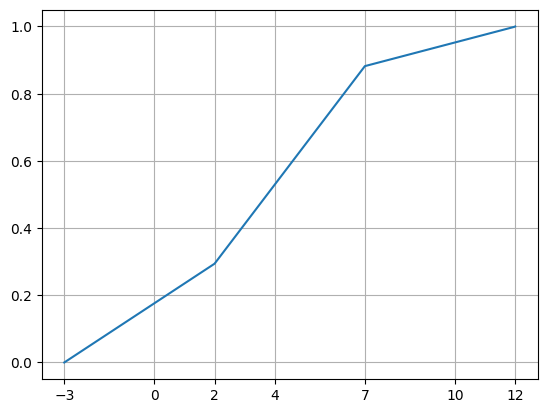

In [345]:
x_values = np.linspace(-3,12,400)
y_values = []
grades = [-3, 00, 2, 4, 7, 10, 12]

i=0
while i < len(x_values):
  y_values.append(CDF(x_values[i]))
  i += 1

y_values = np.array(y_values)
plt.plot(x_values,y_values)
plt.xticks(grades)
plt.grid(True)
plt.show()

From the graph we can see that in the interval 2-7, the function graph is steepest. This means that a lot of the probaility accumalates in this interval, and therefore this is the region where the probability mass is concentrated.

### Exercise 4a
We are to find P(X>6) from the normal distrubtion of programming experience level survey. We have μ = 3.71 and σ = 1.25.